In [ ]:
#!pip install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Config and Setup

In [ ]:
#Setup for data lading for training the model

google_drive_path = '/content/drive/My Drive'

img_zip_path = google_drive_path + '/ml_datasets/CELEBA/img_align_celeba.zip'

labels_path = google_drive_path + 'ml_datasets/CELEBA/Anno/list_attr_celeba.txt'

data_folder_root = 'tmp/'


In [ ]:
# Set up for inferencing only

#path to list_attr_celeba.txt
labels_path_inferencing = 'list_attr_celeba.txt'

# path to best model (in this case comp3419_celeba_model)
model_path_inferencing = 'comp3419_celeba_model'

#path to image that will be used for inferencing
image_path = "test_face.jpg"

# Data Acquisiation

In [ ]:



import os
import zipfile
import pandas as pd
import numpy as np

zip_ref = zipfile.ZipFile(img_zip_path, 'r')
zip_ref.extractall()
zip_ref.close()




In [ ]:

labels_df = pd.read_csv(labels_path)
labels_df.head()

print(len(labels_df))




202600


In [ ]:
    # NUM_EXAMPLES = 202599
    # TRAIN_START = 0
    # TRAIN_STOP = 162770
    # VALID_START = TRAIN_STOP + 1
    # VALID_STOP = 182637
    # TEST_START = VALID_STOP + 1
    # TEST_STOP = NUM_EXAMPLES

    NUM_EXAMPLES = int(202599/2)
    TRAIN_START = 0
    TRAIN_STOP = int(162770/2)
    VALID_START = TRAIN_STOP + 1
    VALID_STOP = int(182637/2)
    TEST_START = VALID_STOP + 1
    TEST_STOP = NUM_EXAMPLES

# Pre-processing

In [ ]:

len((labels_df['202599'][0]).split()), (labels_df['202599'][0]).split()



(40,
 ['5_o_Clock_Shadow',
  'Arched_Eyebrows',
  'Attractive',
  'Bags_Under_Eyes',
  'Bald',
  'Bangs',
  'Big_Lips',
  'Big_Nose',
  'Black_Hair',
  'Blond_Hair',
  'Blurry',
  'Brown_Hair',
  'Bushy_Eyebrows',
  'Chubby',
  'Double_Chin',
  'Eyeglasses',
  'Goatee',
  'Gray_Hair',
  'Heavy_Makeup',
  'High_Cheekbones',
  'Male',
  'Mouth_Slightly_Open',
  'Mustache',
  'Narrow_Eyes',
  'No_Beard',
  'Oval_Face',
  'Pale_Skin',
  'Pointy_Nose',
  'Receding_Hairline',
  'Rosy_Cheeks',
  'Sideburns',
  'Smiling',
  'Straight_Hair',
  'Wavy_Hair',
  'Wearing_Earrings',
  'Wearing_Hat',
  'Wearing_Lipstick',
  'Wearing_Necklace',
  'Wearing_Necktie',
  'Young'])

In [ ]:
label_dict = {}
for i in range(1, len(labels_df)):
    label_dict[labels_df['202599'][i].split()[0]] = [x for x in labels_df['202599'][i].split()[1:]]



In [ ]:
label_df = pd.DataFrame(label_dict).T

label_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
label_df.columns = (labels_df['202599'][0]).split()
label_df.replace(['-1'], ['0'], inplace = True)
label_df.index

class_names = list(label_df.columns)

print(class_names[2])





Attractive


In [ ]:
def get_labels_from_index(index_list):
  
  labels = []
  for i, value in enumerate(index_list):
    if value == 1:
      labels.append(class_names[i])

  return labels

In [ ]:
def get_labels_from_index_as_string(index_list):
  print(index_list)
  labels = ""
  for i, value in enumerate(index_list):
    if value == 1:
      labels += str(class_names[i])
      labels += " "

  return labels

In [ ]:
from glob import glob

files = glob('img_align_celeba/*.jpg')
len(files)

202599

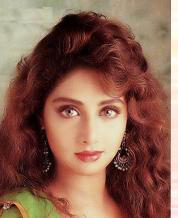

In [ ]:
from PIL import Image
Image.open('img_align_celeba/202594.jpg')

In [ ]:
shuffle = np.random.permutation(len(files))

In [ ]:
if not os.path.exists(data_folder_root + '/train/data'):
  os.makedirs(data_folder_root + '/train/data')
os.path.join(data_folder_root, 'train')
os.path.join(data_folder_root, 'train/data')

if not os.path.exists(data_folder_root + '/valid/data'):
    os.makedirs(data_folder_root + '/valid/data')
os.path.join(data_folder_root, 'valid')
os.path.join(data_folder_root', 'valid/data')

if not os.path.exists(data_folder_root + '/test/data'):
    os.makedirs(data_folder_root + '/test/data')
os.path.join(data_folder_root, 'test')
os.path.join(data_folder_root, 'test/data')




'/tmp/test/data'

In [ ]:
from tqdm import tqdm

valid_dict = {}
valid_file_names = []
for i in tqdm(shuffle[VALID_START:VALID_STOP]):
    file_name = files[i].split('/')[-1]
    labels = np.array(label_df[label_df.index==file_name])
    valid_dict[file_name] = labels
    valid_file_names.append(file_name)
    # os.rename(files[i], os.path.join('/tmp/', 'valid/data', file_name))
    os.rename(files[i], data_folder_root + '/valid/data/' + file_name)

100%|██████████| 9932/9932 [01:58<00:00, 83.79it/s]


In [ ]:
valid_df = pd.DataFrame(valid_dict.values())
valid_df.head()

valid_df.index = valid_file_names
valid_df.columns = ['labels']

valid_df.head()


,labels
005470.jpg,"[[0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,..."
162251.jpg,"[[0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,..."
004482.jpg,"[[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,..."
077448.jpg,"[[0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,..."
073020.jpg,"[[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [ ]:
train_dict = {}
train_file_names = []
for i in tqdm(shuffle[TRAIN_START:TRAIN_STOP]):
    file_name = files[i].split('/')[-1]
    labels = np.array(label_df[label_df.index==file_name])
    train_dict[file_name] = labels
    train_file_names.append(file_name)
    os.rename(files[i], data_folder_root + '/train/data/' + file_name)

len(train_dict)

100%|██████████| 81385/81385 [15:43<00:00, 86.28it/s]


81385

In [ ]:
train_df = pd.DataFrame(train_dict.values())
train_df.index = train_file_names
train_df.columns = ['labels']
train_df.head()

,labels
044372.jpg,"[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,..."
010432.jpg,"[[0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,..."
118261.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,..."
095380.jpg,"[[1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,..."
162744.jpg,"[[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,..."


In [ ]:
test_dict = {}
test_file_names = []
for i in tqdm(shuffle[TEST_START:TEST_STOP]):
    file_name = files[i].split('/')[-1]
    labels = np.array(label_df[label_df.index==file_name])
    test_dict[file_name] = labels
    test_file_names.append(file_name)
    os.rename(files[i], data_folder_root + '/test/data/' + file_name)

len(test_dict)

100%|██████████| 9980/9980 [01:55<00:00, 86.62it/s]


9980

In [ ]:
test_df = pd.DataFrame(test_dict.values())
test_df.index = test_file_names
test_df.columns = ['labels']
test_df.head()

,labels
155600.jpg,"[[0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,..."
045779.jpg,"[[1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,..."
084669.jpg,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,..."
101996.jpg,"[[0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,..."
036113.jpg,"[[0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,..."


# Batches and Training


In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torchvision
from glob import glob
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision import models
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch.optim import lr_scheduler
from torch import optim
from torchvision.utils import make_grid
import time
from torch.utils.data import Dataset
from PIL import Image 
%matplotlib inline

In [ ]:
class MultiClassCelebA(Dataset):
    
    def __init__(self, dataframe, folder_dir, transform = None):
        
        self.dataframe = dataframe
        self.folder_dir = folder_dir
        self.transform = transform
        self.file_names = dataframe.index
        self.labels = dataframe.labels.values.tolist()
        
        
    def __len__(self):
        return len(self.dataframe)
    
    
    def __getitem__(self, index):
        
        image = Image.open(os.path.join(self.folder_dir, self.file_names[index]))
        label = self.labels[index][0]
        sample = {'image': image, 'label': label.astype(float)}
        if self.transform:
            image = self.transform(sample['image'])
            sample = {'image': image, 'label': label.astype(float)}
        
        return sample

In [ ]:

tfms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

#some wackyness to help Colab find the tmp folder
data_folder_prefix = data_folder_root
if data_folder_root == 'tmp/':
  data_folder_prefix = './tmp'
train_dl = MultiClassCelebA(train_df, data_folder_prefix + '/train/data', transform = tfms)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


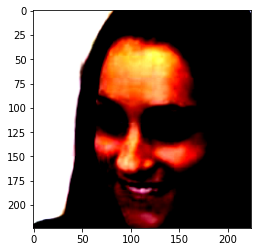

In [ ]:
plt.imshow(torchvision.utils.make_grid(train_dl[10]['image']).permute(1, 2, 0))

In [ ]:
train_dl[10]['image'].shape

torch.Size([3, 224, 224])

In [ ]:
(train_dl[1]['label'])
print(get_labels_from_index(train_dl[1]['label']))
print(get_labels_from_index_as_string(train_dl[1]['label']))

['Arched_Eyebrows', 'Attractive', 'Big_Lips', 'Brown_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Mouth_Slightly_Open', 'Narrow_Eyes', 'No_Beard', 'Rosy_Cheeks', 'Smiling', 'Wavy_Hair', 'Wearing_Lipstick', 'Young']
[0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
Arched_Eyebrows Attractive Big_Lips Brown_Hair Heavy_Makeup High_Cheekbones Mouth_Slightly_Open Narrow_Eyes No_Beard Rosy_Cheeks Smiling Wavy_Hair Wearing_Lipstick Young 


In [ ]:


valid_dl = MultiClassCelebA(valid_df, data_folder_prefix + '/valid/data', transform = tfms)


In [ ]:
test_dl = MultiClassCelebA(test_df, data_folder_prefix + '/test/data', transform = tfms)

In [ ]:
def check_cuda():
    _cuda = False
    if torch.cuda.is_available():
        _cuda = True
    return _cuda

In [ ]:
is_cuda  = check_cuda()
print(is_cuda)

True


In [ ]:

train_dataloader = torch.utils.data.DataLoader(train_dl, shuffle = True, batch_size = 128, num_workers = 4)
valid_dataloader = torch.utils.data.DataLoader(valid_dl, shuffle = True, batch_size = 128, num_workers = 4)
test_dataloader = torch.utils.data.DataLoader(test_dl, shuffle = True, batch_size = 128, num_workers = 4)



# Transfer Learning

In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [ ]:
dataloaders = {}

dataloaders["train"] = train_dataloader
dataloaders["valid"] = valid_dataloader
dataloaders["test"] = test_dataloader

dataset_sizes = {}

dataset_sizes["train"] = len(train_dataloader.dataset)
dataset_sizes["valid"] = len(valid_dataloader.dataset)
dataset_sizes["test"] = len(test_dataloader.dataset)



class_names = list(label_df.columns)
print(class_names)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Get a batch of training data
inputs, classes = next(iter(dataloaders["train"]))
print(device)



81385
['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']
cuda


In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    decision_value = 0.5

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                # print("train")
                model.train()  # Set model to training mode
            else:
                print("eval")
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            running_true_positive = 0
            running_true_negative = 0
            running_false_positive = 0
            running_false_negative = 0

            # Iterate over data.
            for i, data in enumerate(dataloaders[phase]):
                inputs, labels = data['image'].float().cuda(), data['label'].float().cuda()


                inputs, labels = Variable(inputs), Variable(labels)

                inputs = inputs.to(device)
                labels = labels.to(device)
                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                  
                    loss = criterion(outputs, labels)
                   
                    normalised_outputs = torch.gt(outputs, decision_value).int()
                   
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                    outputs.detach()


                # statistics
                running_loss += loss.item() * inputs.size(0)
                print(normalised_outputs)
                print(labels.data)
                
                N = normalised_outputs.size(0)
                C = normalised_outputs.size(1)
                
                accuracy = torch.sum(normalised_outputs == labels.data)/(N*C) * 100
                running_corrects += accuracy

                batch_acc = train_accuracy(normalised_outputs.to("cpu"), labels.data.to("cpu"))


                true_positive = (labels.data * normalised_outputs).sum().to(torch.float32)
                true_negative = ((1 - labels.data) * (1 - normalised_outputs)).sum().to(torch.float32)
                false_positive = ((1 - labels.data) * normalised_outputs).sum().to(torch.float32)
                false_negative = (labels.data * (1 - normalised_outputs)).sum().to(torch.float32)

                running_true_positive += true_positive
                running_true_negative += true_negative 
                running_false_positive += false_positive
                running_false_negative += false_negative



                
            if phase == 'train':
                scheduler.step()


            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            epoch_true_positive = running_true_positive / dataset_sizes[phase]
            epoch_false_positive = running_false_positive / dataset_sizes[phase]
            epoch_false_negative = running_false_negative / dataset_sizes[phase]
            
            # total accuracy over all training batches
            total_train_accuracy = train_accuracy.compute()

            epsilon = 1e-7
    
            precision = epoch_true_positive / (epoch_true_positive + epoch_false_positive + epsilon)
            recall = epoch_true_positive / (epoch_true_positive + epoch_false_negative + epsilon)
          
            f1 = 2* (precision*recall) / (precision + recall + epsilon)
  

            print('{} Loss: {:.4f} Acc: {:.4f} Train Acc {:.4f}'.format(
                phase, epoch_loss, epoch_acc, total_train_accuracy))
            
            print("Precision: {:.4f} Recall: {:.4f} F1 Score: {:.4f}".format(precision, recall, f1))

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                valid_accuracy(normalised_outputs, labels.data)
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

                total_valid_accuracy = valid_accuracy.compute() 
                print("total valid accuracy {:.4f}".format(total_valid_accuracy))

                torch.save(model, "model_in_epocs")

            inputs.detach()
            labels.detach()
                
            torch.cuda.empty_cache() 


        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
def test_model(model, criterion):
    since = time.time()

    decision_value = 0.5

    best_acc = 0.0

    # Set model to evaluate mode
    model.eval()

    running_loss = 0.0
    running_corrects = 0

    running_true_positive = 0
    running_true_negative = 0
    running_false_positive = 0
    running_false_negative = 0

    # Iterate over data.
    for i, data in enumerate(dataloaders["test"]):

        inputs, labels = data['image'].float().cuda(), data['label'].float().cuda()


        inputs, labels = Variable(inputs), Variable(labels)

        inputs = inputs.to(device)
        labels = labels.to(device)


        # track history if only in train
        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            normalised_outputs = torch.gt(outputs, decision_value).int()
            outputs.detach()


        # statistics
        running_loss += loss.item() * inputs.size(0)
        
        N = normalised_outputs.size(0)
        C = normalised_outputs.size(1)
        
        accuracy = torch.sum(normalised_outputs == labels.data)/(N*C) * 100
        running_corrects += accuracy

        batch_acc = train_accuracy(normalised_outputs.to("cpu"), labels.data.to("cpu"))


        true_positive = (labels.data * normalised_outputs).sum().to(torch.float32)
        true_negative = ((1 - labels.data) * (1 - normalised_outputs)).sum().to(torch.float32)
        false_positive = ((1 - labels.data) * normalised_outputs).sum().to(torch.float32)
        false_negative = (labels.data * (1 - normalised_outputs)).sum().to(torch.float32)

        running_true_positive += true_positive
        running_true_negative += true_negative 
        running_false_positive += false_positive
        running_false_negative += false_negative



    epoch_loss = running_loss / dataset_sizes["test"]
    epoch_acc = running_corrects.double() / dataset_sizes["test"]

    epoch_true_positive = running_true_positive / dataset_sizes["test"]
    epoch_false_positive = running_false_positive / dataset_sizes["test"]
    epoch_false_negative = running_false_negative / dataset_sizes["test"]
    # total accuracy over all training batches
    total_train_accuracy = train_accuracy.compute()

    epsilon = 1e-7

    precision = epoch_true_positive / (epoch_true_positive + epoch_false_positive + epsilon)
    recall = epoch_true_positive / (epoch_true_positive + epoch_false_negative + epsilon)

    f1 = 2* (precision*recall) / (precision + recall + epsilon)


    print('{} Loss: {:.4f} Acc: {:.4f} Test Acc {:.4f}'.format(
        "test", epoch_loss, epoch_acc, total_train_accuracy))
    
    print("Precision: {:.4f} Recall: {:.4f} F1 Score: {:.4f}".format(precision, recall, f1))

    inputs.detach()
    labels.detach()
        
    torch.cuda.empty_cache() 


    print()

    time_elapsed = time.time() - since
    print('Testing complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))

    return model

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    decision_value = 0.8


    with torch.no_grad():
        for i, data in enumerate(dataloaders['test']):
            inputs, labels = data['image'].float().cuda(), data['label'].float().cuda()
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            normalised_outputs = torch.gt(outputs, decision_value).int()

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')

                print(normalised_outputs)
                title = get_labels_from_index_as_string(normalised_outputs.tolist()[j])
                ground_truth = get_labels_from_index_as_string(labels.tolist()[j])
                print("Preidcted {}".format(title))
                print("Ground Truth {}".format(ground_truth))
                ax.set_title('predicted: {}\nground truth {}'.format(title,ground_truth ))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [ ]:
! nvidia-smi

Sat Nov 21 22:22:03 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |     10MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#set to true if you want to load the model rather than start afresh with Resnet

contine_training = True
model_name = "model_22_11_v3_epochs"
model_save_name = "model_22_11_v4_epochs"

In [ ]:
#! pip3 install pytorch_lightning

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch
from pytorch_lightning import metrics
import torch.nn as nn

torch.cuda.empty_cache()

if not contine_training:
  print("Loading pretrained resnet")
  model_ft = models.resnet18(pretrained=True)
  num_ftrs = model_ft.fc.in_features


  model_ft.fc = nn.Sequential(
      nn.Linear(num_ftrs, len(class_names)),
      nn.Sigmoid()
  )

  for name,param in model_ft.named_parameters():
    if param.requires_grad == True:
      print("\t",name)
else:
  print("Loading previous model")
  model_ft = torch.load("/content/drive/My Drive/ml_datasets/CELEBA/Saved Models/" + model_name)

print(torch.cuda.get_device_name(0))

device = torch.device(
            "cuda" if torch.cuda.is_available() else "cpu")


train_accuracy = metrics.Accuracy()
valid_accuracy = metrics.Accuracy(compute_on_step=False)


model_ft = model_ft.to(device)

criterion = nn.BCELoss()

lr = 0.01

optimizer_ft = optim.Adam(model_ft.parameters(), lr)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)



Loading previous model
Tesla T4
cuda


In [ ]:

model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=30)

torch.save(model_ft, model_save_name)


Epoch 0/29
----------
train Loss: 0.1509 Acc: 0.7302 Train Acc 0.9344
Precision: 0.8803 Recall: 0.8215 F1 Score: 0.8499
eval
valid Loss: 0.2217 Acc: 0.7142 Train Acc 0.9094
Precision: 0.8078 Recall: 0.7874 F1 Score: 0.7974
total valid accuracy 0.9033

Epoch 1/29
----------
train Loss: 0.1427 Acc: 0.7331 Train Acc 0.9382
Precision: 0.8858 Recall: 0.8339 F1 Score: 0.8590
eval
valid Loss: 0.2168 Acc: 0.7145 Train Acc 0.9098
Precision: 0.8326 Recall: 0.7535 F1 Score: 0.7911
total valid accuracy 0.9062

Epoch 2/29
----------
train Loss: 0.1345 Acc: 0.7361 Train Acc 0.9420
Precision: 0.8920 Recall: 0.8454 F1 Score: 0.8681
eval
valid Loss: 0.2226 Acc: 0.7133 Train Acc 0.9083
Precision: 0.8191 Recall: 0.7639 F1 Score: 0.7906

Epoch 3/29
----------
train Loss: 0.1265 Acc: 0.7390 Train Acc 0.9457
Precision: 0.8978 Recall: 0.8571 F1 Score: 0.8769
eval
valid Loss: 0.2312 Acc: 0.7133 Train Acc 0.9082
Precision: 0.8135 Recall: 0.7717 F1 Score: 0.7921

Epoch 4/29
----------
train Loss: 0.1183 Acc: 0.

tensor([[0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 1],
        [0, 0, 1,  ..., 0, 0, 1]], device='cuda:0', dtype=torch.int32)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
Preidcted Heavy_Makeup No_Beard Wearing_Lipstick Young 
Ground Truth Bags_Under_Eyes Brown_Hair Heavy_Makeup No_Beard Pointy_Nose Wavy_Hair Wearing_Lipstick Young 


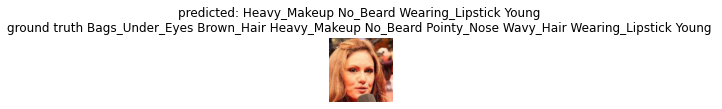

tensor([[0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 1],
        [0, 0, 1,  ..., 0, 0, 1]], device='cuda:0', dtype=torch.int32)
[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
Preidcted Big_Lips Big_Nose Male Mouth_Slightly_Open Young 
Ground Truth Big_Lips Big_Nose Goatee High_Cheekbones Male Mouth_Slightly_Open Young 


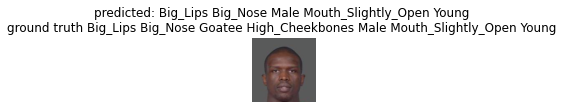

tensor([[0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 1],
        [0, 0, 1,  ..., 0, 0, 1]], device='cuda:0', dtype=torch.int32)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
Preidcted Bushy_Eyebrows Male Young 
Ground Truth Arched_Eyebrows Attractive Bushy_Eyebrows Male Young 


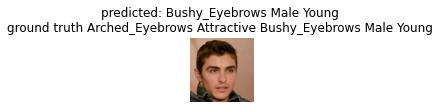

tensor([[0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 1],
        [0, 0, 1,  ..., 0, 0, 1]], device='cuda:0', dtype=torch.int32)
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
Preidcted Attractive Heavy_Makeup Mouth_Slightly_Open No_Beard Oval_Face Pointy_Nose Wearing_Lipstick Young 
Ground Truth Attractive Brown_Hair Heavy_Makeup High_Cheekbones Mouth_Slightly_Open No_Beard Oval_Face Pointy_Nose Rosy_Cheeks Straight_Hair Wearing_Lipstick Young 


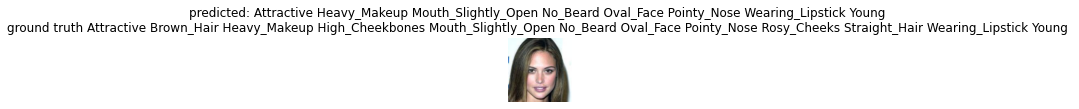

tensor([[0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 1],
        [0, 0, 1,  ..., 0, 0, 1]], device='cuda:0', dtype=torch.int32)
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]
[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
Preidcted Attractive Brown_Hair Heavy_Makeup Mouth_Slightly_Open No_Beard Smiling Wearing_Lipstick Young 
Ground Truth Arched_Eyebrows Attractive Brown_Hair Heavy_Makeup Mouth_Slightly_Open No_Beard Oval_Face Smiling Wearing_Lipstick Young 


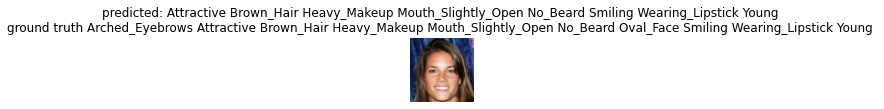

tensor([[0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 1],
        [0, 0, 1,  ..., 0, 0, 1]], device='cuda:0', dtype=torch.int32)
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
Preidcted Big_Nose Double_Chin Eyeglasses Gray_Hair Male Mouth_Slightly_Open No_Beard Receding_Hairline Smiling 
Ground Truth Big_Nose Chubby Double_Chin Eyeglasses Gray_Hair High_Cheekbones Male Mouth_Slightly_Open No_Beard Receding_Hairline Smiling Wearing_Necktie 


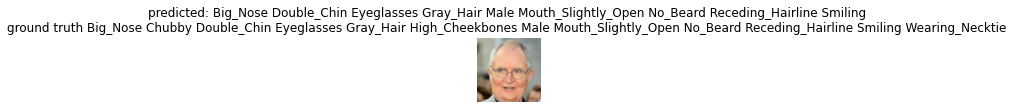

In [ ]:
visualize_model(model_ft)

In [ ]:
test_model(model_ft, criterion)

test Loss: 0.2179 Acc: 0.7106 Test Acc 0.9092
Precision: 0.8311 Recall: 0.7519 F1 Score: 0.7895

Testing complete in 0m 31s


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Inferencing

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch
import torch.nn as nn
from torchvision import transforms
from torch.autograd import Variable
from PIL import Image 
import pandas as pd

class CelebAModel():

  def __init__(self, model_path, labels_path):
    self.model_path = model_path
    self.labels_path = labels_path
    model = torch.load(self.model_path)

    self.tfms = transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])


    labels_df = pd.read_csv(self.labels_path)
    label_dict = {}
    for i in range(1, len(labels_df)):
      label_dict[labels_df['202599'][i].split()[0]] = [x for x in labels_df['202599'][i].split()[1:]]
    self.label_df = pd.DataFrame(label_dict).T

    self.label_df.columns = (labels_df['202599'][0]).split()
    self.label_df.replace(['-1'], ['0'], inplace = True)

    self.class_names = list(self.label_df.columns)


    self.decision_value = 0.5;

    self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    self.model = model.to(self.device)

  def get_labels_from_index(self, index_list):
    labels = []
    for i, value in enumerate(index_list):
      if value == 1:
        labels.append(self.class_names[i])

    return labels

  def evaluate(self, image):
    normalised_image = self.tfms(image)

        
    inputs = torch.unsqueeze(normalised_image, 0)

    inputs = inputs.to(self.device)

    self.model.eval()

    outputs = self.model(inputs)
    normalised_outputs = torch.gt(outputs, self.decision_value).int()
    return self.get_labels_from_index(normalised_outputs.tolist()[0])

In [ ]:
#only the model is required for this. Modify the model_path_inferencing and labels_path_inferencing in the config 
# to load the model and prepare for it for inferencing
celeba = CelebAModel(model_path_inferencing, labels_path_inferencing)


In [ ]:
#run an inference on the image
#image_path is set int the config  - default is "test_face.jpg"
image = Image.open(image_path)


#actually evaluate the image and print the predicted labels
print(celeba.evaluate(image))

['Blurry', 'Brown_Hair', 'Male', 'Mouth_Slightly_Open', 'Young']
